In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('ready_for_encoding.csv')
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,payer_code,num_medications,diag_1,diag_2,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_target,total_treatments,total_visits,total_procedures,readmitted_multi
0,Caucasian,Female,5,Other,Other,1,Unknown_Other,1,diabetes,Other,...,0,0,No,No,NO,0,0,0,41,0
1,Caucasian,Female,15,Emergency,Home,3,Unknown_Other,18,Other,diabetes,...,0,0,Yes,Yes,>30,1,1,0,59,2
2,AfricanAmerican,Female,25,Emergency,Home,2,Unknown_Other,13,Other,diabetes,...,0,0,No,Yes,NO,0,1,3,16,0
3,Caucasian,Male,35,Emergency,Home,2,Unknown_Other,16,Other,diabetes,...,0,0,Yes,Yes,NO,0,1,0,45,0
4,Caucasian,Male,45,Emergency,Home,1,Unknown_Other,8,Other,Other,...,0,0,Yes,Yes,NO,0,2,0,51,0


# Split and Encode:

## Train Test Split:

In [4]:
X = df.drop(['readmitted', 'readmitted_target', 'readmitted_multi'], axis=1)
y = df['readmitted_target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size=.2, random_state=42)

X_train.shape, X_test.shape

((80088, 40), (20023, 40))

In [6]:
y_train.shape, y_test.shape

((80088,), (20023,))

## Encoding Pipelines:

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [8]:
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'payer_code', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'insulin', 'change', 'diabetesMed'],
      dtype='object')

In [9]:
num_cols = X_train.select_dtypes('int64').columns
num_cols

Index(['age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'total_treatments', 'total_visits',
       'total_procedures'],
      dtype='object')

In [10]:
num_pipe = Pipeline([
    ('scaler', 
    StandardScaler())])

In [11]:
cat_pipe = Pipeline([
    ('encoder',
        OneHotEncoder(sparse=False))])

# drop='if_binary',

In [12]:
preprocessing = ColumnTransformer(transformers=[
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'to...
       'metformin-pioglitazone', 'total_treatments', 'total_visits',
       'total_procedures'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(sparse=False))]),
                                 Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'payer_code', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'insulin', 'change', 'diabetesMe

In [13]:
X_train_trans = preprocessing.fit_transform(X_train)
X_test_trans = preprocessing.transform(X_test)

In [14]:
feature_names = preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
# feature_names

In [15]:
num_cols = num_cols.tolist()
X_cols = num_cols+feature_names
# X_cols

In [16]:
X_train = pd.DataFrame(X_train_trans,columns=X_cols)
X_test = pd.DataFrame(X_test_trans,columns=X_cols)
X_train.head()

,age,time_in_hospital,num_medications,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,...,A1Cresult_None,A1Cresult_Norm,insulin_Decreased,insulin_Increased,insulin_No Change,insulin_None,change_No,change_Yes,diabetesMed_No,diabetesMed_Yes
0,-0.051043,3.227674,5.317452,0.820820,-0.499188,-0.125045,-0.083838,-0.029577,-0.233268,-0.003534,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-2.558958,0.539380,0.620161,0.820820,-0.499188,-0.125045,-0.083838,-0.029577,-0.233268,-0.003534,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.051043,1.883527,-0.492356,0.303993,2.003252,-0.125045,-0.083838,-0.029577,-0.233268,-0.003534,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,-1.305000,-1.140804,0.002096,0.820820,-0.499188,-0.125045,-0.083838,-0.029577,-0.233268,-0.003534,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.051043,-0.804767,-0.245130,0.303993,2.003252,-0.125045,-0.083838,-0.029577,-0.233268,-0.003534,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [19]:
y_train.head()

54556    0
83192    0
20989    1
88159    1
67397    0
Name: readmitted_target, dtype: int64

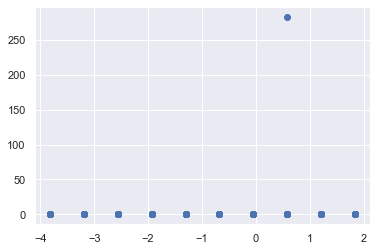

In [18]:
plt.scatter(X_train.age, X_train.acetohexamide);

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from xgboost import XGBClassifier


In [29]:
# k-fold with SMOTE & StandardScaler

def k_fold(X_train, X_test, y_train, y_test, KFold_splits, model):
    
#     X = np.array(df[df.columns[:-1]])
#     Y = np.array(df[df.columns[-1:]]['readmitted'])
    
    kf = KFold(n_splits = KFold_splits, random_state = 42, shuffle = True) 
    
    iteration = 0
    
    test_accuracy_score_list = []
    train_accuracy_score_list = []
    train_recall_score_list = []
    test_recall_score_list = []
    test_precision_score_list = []
    train_precision_score_list = []
    test_f1_score_list = []
    train_f1_score_list = []
    
    class_0_accuracy_list = []
    class_1_accuracy_list = []
    class_0_recall_list = []
    class_1_recall_list = []
    
    train_roc_auc_list = []
    test_roc_auc_list = []
    
#     for train_index, test_index in kf.split(X):
#         iteration += 1
#         print(iteration)
        
#         train_X, test_X = X[train_index], X[test_index]
#         train_Y, test_Y = Y[train_index], Y[test_index]
        
#         scaler = preprocessing.StandardScaler()
#         train_X = scaler.fit_transform(train_X.astype(np.float64))
#         test_X = scaler.transform(test_X.astype(np.float64))
        
    sm = SMOTE(random_state=42)
    train_X, train_Y = sm.fit_sample(X_train, y_train)
        
    model.fit(train_X,train_Y)
    train_predictions = model.predict(train_X)
    test_predictions = model.predict(X_test)
        
    train_accuracy_score_list.append(metrics.accuracy_score(train_Y,train_predictions))
    test_accuracy_score_list.append(metrics.accuracy_score(y_test,test_predictions))
    train_recall_score_list.append(metrics.recall_score(train_Y,train_predictions))
    test_recall_score_list.append(metrics.recall_score(y_test,test_predictions))
    train_precision_score_list.append(metrics.precision_score(train_Y, train_predictions))
    test_precision_score_list.append(metrics.precision_score(y_test, test_predictions))
    train_f1_score_list.append(metrics.f1_score(train_Y, train_predictions))
    test_f1_score_list.append(metrics.f1_score(y_test, test_predictions))
        
    cm = metrics.confusion_matrix(y_test,  test_predictions)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    class_0_accuracy_list.append(cm.diagonal()[0])
    class_1_accuracy_list.append(cm.diagonal()[1])
    class_0_recall_list.append(metrics.recall_score(y_test,test_predictions,
                                                    average=None)[0])
    class_1_recall_list.append(metrics.recall_score(y_test,test_predictions,
                                                    average=None)[1])
        
    train_roc_auc_list.append(metrics.roc_auc_score(train_Y, train_predictions))
    test_roc_auc_list.append(metrics.roc_auc_score(y_test, test_predictions))
    
    
    results_df = pd.DataFrame(index=['accuracy','recall','precision','f1','roc'])
    results_df['train'] = [np.mean(train_accuracy_score_list),
                           np.mean(train_recall_score_list), 
                            np.mean(train_precision_score_list),
                           np.mean(train_f1_score_list),
                          np.mean(train_roc_auc_list)]
    results_df['test'] = [np.mean(test_accuracy_score_list),
                          np.mean(test_recall_score_list),
                           np.mean(test_precision_score_list),
                          np.mean(test_f1_score_list),
                          np.mean(test_roc_auc_list)]
    
    results_df['class_0_test'] = [np.mean(class_0_accuracy_list),
                                  np.mean(class_0_recall_list),'-','-','-']
    results_df['class_1_test'] = [np.mean(class_1_accuracy_list),
                                  np.mean(class_1_recall_list),'-','-','-']
    
    return(results_df)


KFold_splits = 10
model = GaussianNB()

k_fold(X_train, X_test, y_train, y_test, KFold_splits, model)

,train,test,class_0_test,class_1_test
accuracy,0.585627,0.594267,0.717619,0.453544
recall,0.453725,0.453544,0.717619,0.453544
precision,0.616311,0.584700,-,-
f1,0.522666,0.510838,-,-
roc,0.585627,0.585582,-,-


In [37]:
xgb = XGBClassifier(random_state=1,learning_rate=0.01)
k_fold(X_train, X_test, y_train, y_test, KFold_splits, xgb)

,train,test,class_0_test,class_1_test
accuracy,0.627460,0.609949,0.646392,0.568374
recall,0.598698,0.568374,0.646392,0.568374
precision,0.635239,0.584883,-,-
f1,0.616427,0.576510,-,-
roc,0.627460,0.607383,-,-


In [1]:
from sklearn.decomposition import PCA

pca = PCA()
transformed = pca.fit_transform(X_train)

NameError: name 'X_train' is not defined

In [ ]:
plt.scatter(transformed[:,0], transformed[:,9]);

In [ ]:
pca.components_

In [ ]:
pca.mean_

In [ ]:
pca.explained_variance_ratio_

# Filter Selection Methods:

## Check for Constant Variables:

Values that are the same across all features.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
sel = VarianceThreshold(threshold=0)

sel.fit(X_train)  # fit finds the features with zero variance

In [ ]:
sum(sel.get_support())

In [ ]:
# opposite of above 
constant = X_train.columns[~sel.get_support()]

len(constant)

In [ ]:
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

len(constant_features)

No constant features, so we can move on.

## Check for Quasi-Constant Variables:

Values that are the same across almost all features.

In [ ]:
sel = VarianceThreshold(threshold=0.01)

num_quasi_constant = sel.fit(X_train)  # fit finds the features with zero variance
num_quasi_constant

In [ ]:
sum(sel.get_support())

In [ ]:
quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant)

## Check for Duplicated Variables:

In [ ]:
# dictionary to store groups of duplicates
duplicated_feat_pairs = {}

# list to collect features with duplicates
_duplicated_feat = []

# iterate over every feature in our dataset:
for i in range(0, len(X_train.columns)):
    
    # this bit helps me understand where the loop is at:
    if i % 10 == 0:  
        print(i)
    
    # choose 1 feature:
    feat_1 = X_train.columns[i]
    
    # check if this feature has already been identified
    # as a duplicate of another one. If it was, it should be stored in
    # our _duplicated_feat list.
    
    # If this feature was already identified as a duplicate, we skip it, if
    # it has not yet been identified as a duplicate, then we proceed:
    if feat_1 not in _duplicated_feat:
    
        # create an empty list as an entry for this feature in the dictionary:
        duplicated_feat_pairs[feat_1] = []

        # now, iterate over the remaining features of the dataset:
        for feat_2 in X_train.columns[i + 1:]:

            # check if this second feature is identical to the first one
            if X_train[feat_1].equals(X_train[feat_2]):

                # if it is identical, append it to the list in the dictionary
                duplicated_feat_pairs[feat_1].append(feat_2)
                
                # and append it to our monitor list for duplicated variables
                _duplicated_feat.append(feat_2)
                
                # done!

In [ ]:
len(_duplicated_feat)

No duplicated variables!